# gpt-image-1 on Azure AI Foundry - Image Generation

<img src="https://azure.microsoft.com/en-us/blog/wp-content/uploads/2025/04/Azure-AI-ML-Scene-3.png" width=300>

https://azure.microsoft.com/en-us/blog/unveiling-gpt-image-1-rising-to-new-heights-with-image-generation-in-azure-ai-foundry/?msockid=2e39c66c693c66a5151fd200687567d0

Source: https://github.com/Azure-Samples/visionary-lab/tree/main


In [13]:
import base64
import datetime
import os
import re
import sys
import time

from dotenv import load_dotenv
from io import BytesIO
from openai import AzureOpenAI
from PIL import Image

In [2]:
sys.version

'3.10.14 (main, May  6 2024, 19:42:50) [GCC 11.2.0]'

In [3]:
datetime.datetime.today().strftime('%d %b %Y %H:%M:%S')

'29 Apr 2025 15:52:22'

In [4]:
load_dotenv("azure.env")

api_version = "2025-04-01-preview"

In [5]:
model="gpt-image-1"

In [6]:
IMAGES_DIR = "images"

In [7]:
RESULTS_DIR = "results"

if os.path.exists(RESULTS_DIR):
    shutil.rmtree(RESULTS_DIR)

os.makedirs(RESULTS_DIR, exist_ok=True)

## 1. Create images using a text prompt

In [9]:
def image_generation(prompt, n=1):
    """
    Generates images using Azure OpenAI's image generation capabilities based on a text prompt.

    Parameters:
        prompt (str): The text prompt to generate images from.
        n (int, optional): The number of images to generate. Defaults to 1.

    Returns:
        list[str] or None: A list of file paths to the saved images if successful, or None if an error occurs.

    The function:
        - Connects to Azure OpenAI using credentials from environment variables.
        - Sends the prompt to the image generation model with specified parameters.
        - Decodes and displays each image.
        - Saves each image to a local results directory with a sanitized filename.
        - Returns a list of saved file paths.
    """
    try:
        # Client
        client = AzureOpenAI(
            azure_endpoint=os.getenv("endpoint"),
            api_key=os.getenv("key"),
            api_version=api_version,
        )

        # Paramaters
        params = {
            "model": model,  # Model
            "prompt": prompt,  # Prompt
            "n": n,  # Number of generated images
            "quality": "high",  # Options: high, medium, low
            "size": "1024x1024",  # Options: 1024x1024, 1536x1024, 1024x1536
        }
        # Results
        result = client.images.generate(**params)
        images_data = result.model_dump().get("data", [])
        encoded_images = [
            img.get("b64_json") for img in images_data if "b64_json" in img
        ]

        # Parsing the generated images
        output_images_list = []

        for encoded_image in encoded_images:
            img = Image.open(BytesIO(base64.b64decode(encoded_image)))
            # Saving image to a file
            now = str(datetime.datetime.today().strftime("%Y%m%d_%H%M%S_%f")[:-3])
            output_file = os.path.join(RESULTS_DIR, f"generated_image_{now}.jpg")
            img.save(output_file)
            print(f"File saved: {output_file}")
            output_images_list.append(output_file)

        return output_images_list

    except Exception as e:
        print(f"Error generating images: {e}")
        return None

In [10]:
prompt = "A beautiful house in tropical modernism style inside of a forest and full of trees and plants"

In [14]:
images_list = image_generation(prompt, 1)

File saved: results/generated_image_20250429_155444_503.jpg


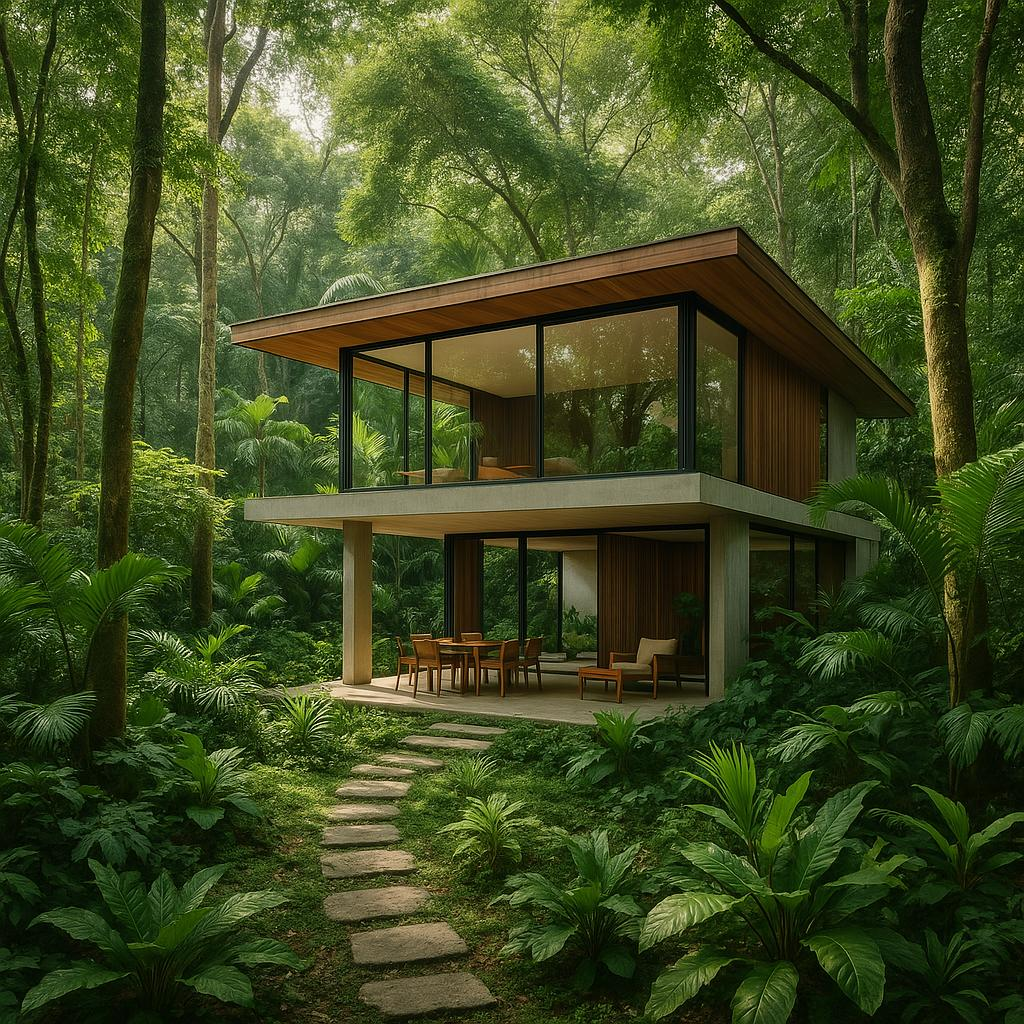

In [15]:
img = Image.open(images_list[0])
img

In [25]:
prompt = """
A 3D cartoon-style action figure of a man named John, displayed inside a clear plastic blister package like a collectible toy. The figure resembles a Caucasian male with black hair, wearing a blue polo with the French flag in the upper left of the polo, black fitted pants, and black dress shoes. He has a titanium wedding band on his left hand.

The packaging has a clean, modern, cartoonish design. The top of the packaging is bright blue, with bold white text that reads: 'John' as the name, and below it, in smaller text: 'I love Azure AI'.

Inside the blister package, next to the figure, are miniature job-related accessories: a black iPhone, black Bose over-ear headphones, a tall coffee cup with the French flag, and a silver Microsoft Surface laptop.

The overall look is colorful, professional, and playful — like a limited-edition tech professional collectible figure sold in stores.
"""

File saved: results/generated_image_20250429_163600_734.jpg


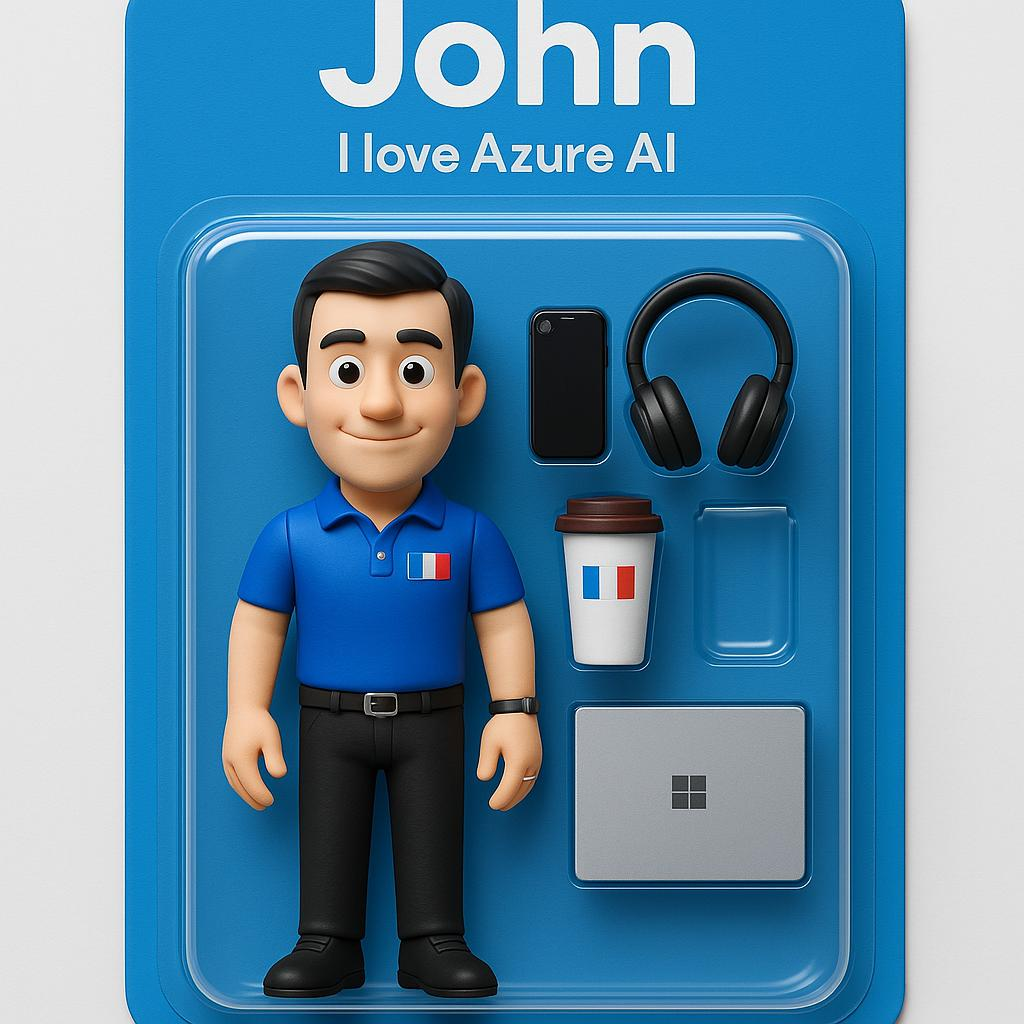

In [26]:
images_list = image_generation(prompt, 1)

img = Image.open(images_list[0])
img

In [18]:
prompt = "Botticelli’s simonetta vespucci young portrait photography hyperrealistic modern dressed, futuristic"

File saved: results/generated_image_20250429_155614_114.jpg


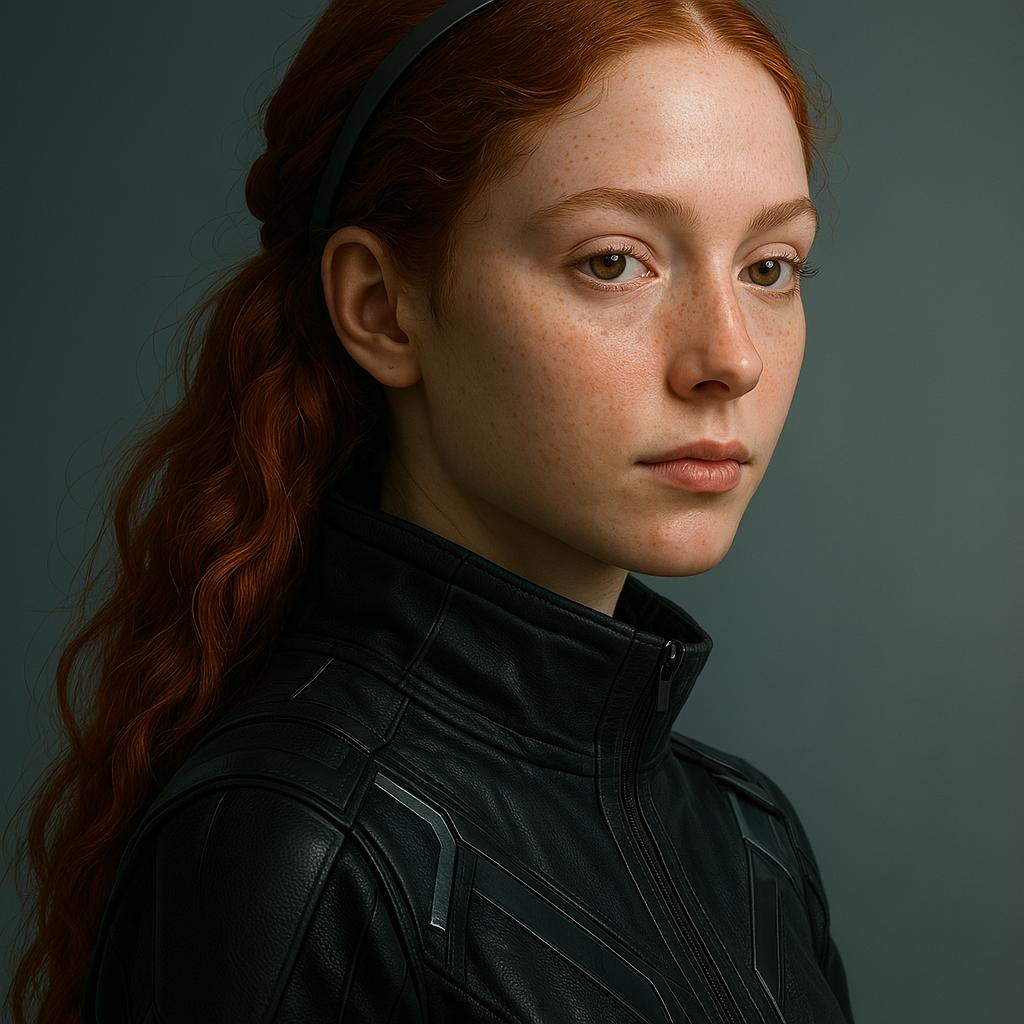

In [19]:
images_list = image_generation(prompt, 1)

img = Image.open(images_list[0])
img

## 2. Create images with a transparent background
Images with transparent backgrounds are useful because they allow seamless layering over different backgrounds without visible edges or unwanted color blocks. This makes them ideal for logos, icons, and UI elements where flexibility and clean integration are important. Additionally, PNG preserves image quality without compression artifacts.

File saved: results/generated_image_20250429_155703_889.jpg


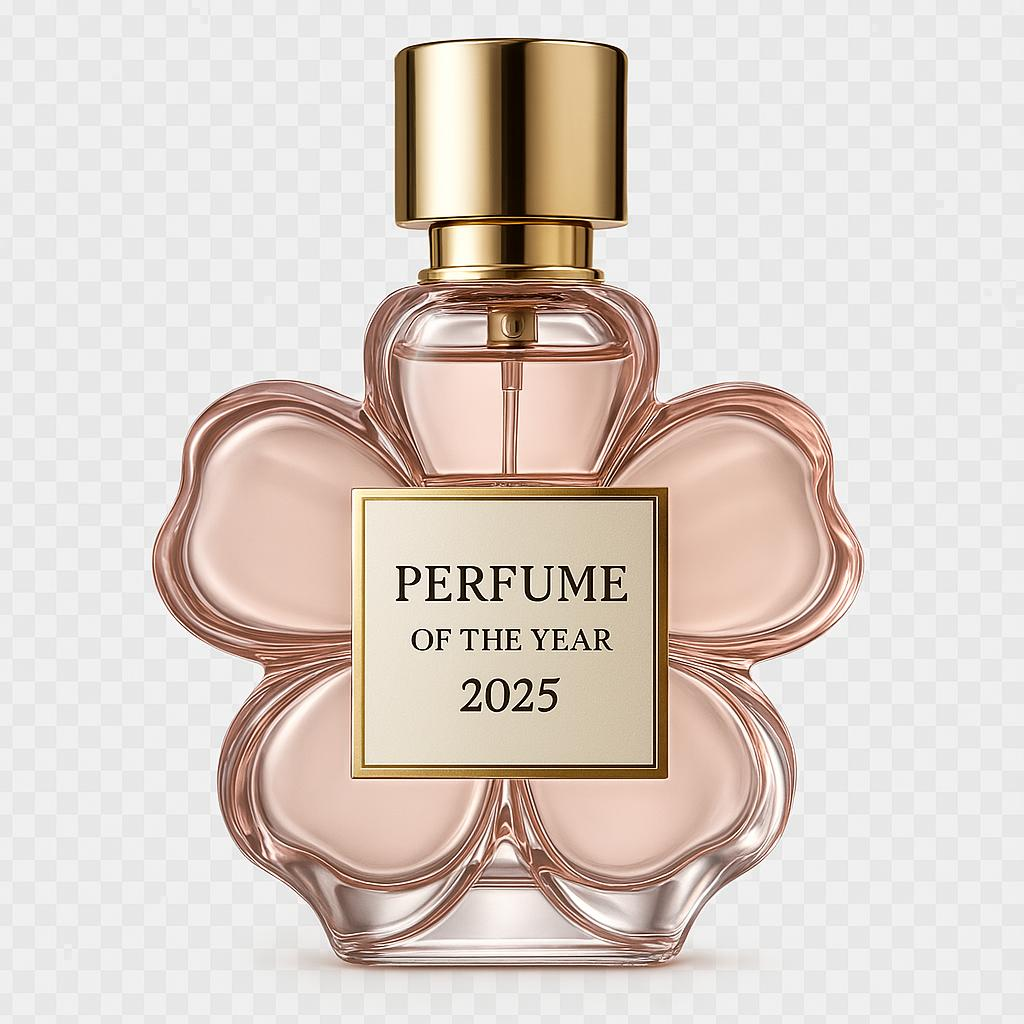

In [20]:
prompt = "A high-resolution, commercial-quality photo of a luxurious, flower-shaped perfume bottle labeled 'Perfume of the Year 2025'. The bottle is upright, designed with an elegant, modern style, featuring a sleek label adorned with gold accents. The overall look should convey sophistication and premium quality. Use a transparent background."

images_list = image_generation(prompt, 1)

img = Image.open(images_list[0])
img